In [3]:
import sys
sys.path.insert(0, '..')
import utils.game_utils as gu

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

nfld = gu.NFL_Data()
nfl_df = nfld.data()
year_df = gu.get_year(nfl_df, 2020)
year_df.head()

,date,year,week,team,team_score,opponent,opponent_score,win,home,overtime,...,team_total_yards_cml_before,opponent_total_yards_cml_before,team_rush_yards_cml_after,opponent_rush_yards_cml_after,team_pass_yards_cml_after,opponent_pass_yards_cml_after,team_total_yards_cml_after,opponent_total_yards_cml_after,team_opp_trn,opponent_opp_trn
5120,2020-09-10,2020,1,Kansas City Chiefs,34,Houston Texans,20,1,1,0,...,0,0,166,118,211,253,369,360,0.5,0.5
5121,2020-09-10,2020,1,Houston Texans,20,Kansas City Chiefs,34,0,0,0,...,0,0,118,166,253,211,360,369,0.5,0.5
5122,2020-09-13,2020,1,Buffalo Bills,27,New York Jets,17,1,1,0,...,0,0,98,52,312,215,404,254,0.5,0.5
5123,2020-09-13,2020,1,New York Jets,17,Buffalo Bills,27,0,0,0,...,0,0,52,98,215,312,254,404,0.5,0.5
5124,2020-09-13,2020,1,Atlanta Falcons,25,Seattle Seahawks,38,0,1,0,...,0,0,72,84,450,322,506,383,0.5,0.5


In [8]:
df = year_df[['team','is_outdoors','win']]
df.head()

,team,is_outdoors,win
5120,Kansas City Chiefs,1,1
5121,Houston Texans,1,0
5122,Buffalo Bills,1,1
5123,New York Jets,1,0
5124,Atlanta Falcons,0,0


In [10]:
dum_df = pd.get_dummies(df)

In [11]:


X = dum_df.drop('win', axis=1)
y = dum_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

log_model = LogisticRegression(solver='saga',multi_class='ovr', max_iter=500)
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = { 
              'penalty': penalty,
              'l1_ratio': l1_ratio,
              'C': C,
              }

grid_model = GridSearchCV(log_model,param_grid=param_grid)
grid_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/anaconda3/lib/python3.8/sit

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [18]:
grid_model.best_params_

{'C': 428.1332398719391, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

y_pred = grid_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5703125

In [20]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [21]:
confusion_matrix(y_test, y_pred)

array([[41, 30],
       [25, 32]])

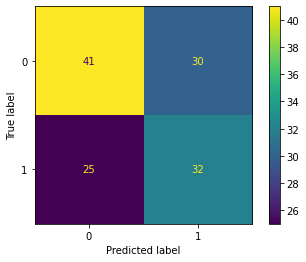

In [26]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60        71
           1       0.52      0.56      0.54        57

    accuracy                           0.57       128
   macro avg       0.57      0.57      0.57       128
weighted avg       0.57      0.57      0.57       128

